In [1]:
# pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
# !kaggle datasets download -d omkargurav/face-mask-dataset

In [4]:
# extracting the compessed Dataset
# from zipfile import Zi


**Importing the Dependencies**

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
# from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [22]:
with_mask_files = os.listdir('yes')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['Y1.jpg', 'Y10.jpg', 'Y100.JPG', 'Y101.jpg', 'Y102.jpg']
['Y95.jpg', 'Y96.jpg', 'Y97.JPG', 'Y98.JPG', 'Y99.JPG']


In [23]:
without_mask_files = os.listdir('no')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg']
['No18.jpg', 'No19.jpg', 'No20.jpg', 'No21.jpg', 'No22.jpg']


In [24]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 155
Number of without mask images: 98


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [25]:
# create the labels

with_mask_labels = [1]*155


without_mask_labels = [0]*98

In [26]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [27]:
print(len(with_mask_labels))
print(len(without_mask_labels))

155
98


In [28]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

253
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

In [29]:
# displaying with mask image
img = mpimg.imread('no\no 2.jpg')
imgplot = plt.imshow(img)
plt.show()

OSError: [Errno 22] Invalid argument: 'no\no 2.jpg'

In [20]:
# displaying without mask image
img = mpimg.imread('no\1no.jpeg')
imgplot = plt.imshow(img)
plt.show()

OSError: [Errno 22] Invalid argument: 'no\x01no.jpeg'

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [31]:
with_mask_path = 'yes'

data = []

for img_file in with_mask_files:
    print(img_file)

Y1.jpg
Y10.jpg
Y100.JPG
Y101.jpg
Y102.jpg
Y103.jpg
Y104.jpg
Y105.jpg
Y106.jpg
Y107.jpg
Y108.jpg
Y109.JPG
Y11.jpg
Y111.JPG
Y112.JPG
Y113.JPG
Y114.JPG
Y115.JPG
Y116.JPG
Y117.JPG
Y12.jpg
Y120.JPG
Y13.jpg
Y14.jpg
Y146.JPG
Y147.JPG
Y148.JPG
Y15.jpg
Y153.jpg
Y154.jpg
Y155.JPG
Y156.JPG
Y157.JPG
Y158.JPG
Y159.JPG
Y16.JPG
Y160.JPG
Y161.JPG
Y162.jpg
Y163.JPG
Y164.JPG
Y165.JPG
Y166.JPG
Y167.JPG
Y168.jpg
Y169.jpg
Y17.jpg
Y170.JPG
Y18.JPG
Y180.jpg
Y181.jpg
Y182.JPG
Y183.jpg
Y184.JPG
Y185.jpg
Y186.jpg
Y187.jpg
Y188.jpg
Y19.JPG
Y192.JPG
Y193.JPG
Y194.jpg
Y195.JPG
Y2.jpg
Y20.jpg
Y21.jpg
Y22.jpg
Y23.JPG
Y24.jpg
Y242.JPG
Y243.JPG
Y244.JPG
Y245.jpg
Y246.JPG
Y247.JPG
Y248.JPG
Y249.JPG
Y25.jpg
Y250.jpg
Y251.JPG
Y252.jpg
Y253.JPG
Y254.jpg
Y255.JPG
Y256.JPG
Y257.jpg
Y258.JPG
Y259.JPG
Y26.jpg
Y27.jpg
Y28.jpg
Y29.jpg
Y3.jpg
Y30.jpg
Y31.jpg
Y32.jpg
Y33.jpg
Y34.jpg
Y35.jpg
Y36.JPG
Y37.jpg
Y38.jpg
Y39.jpg
Y4.jpg
Y40.JPG
Y41.jpg
Y42.jpg
Y44.JPG
Y45.JPG
Y46.jpg
Y47.JPG
Y49.JPG
Y50.JPG
Y51.jpg
Y52.jpg
Y53.jpg
Y54.jp

In [33]:
# convert images to numpy arrays+

with_mask_path = 'yes'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path+ "/" + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = 'no'


for img_file in without_mask_files:

  image = Image.open(without_mask_path+'/' + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [16]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Use GPU with ID 1, change the ID as needed
import tensorflow as tf


In [17]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"  # Use the only available GPU


In [34]:
type(data)

list

In [35]:
len(data)

253

In [36]:
data[0]

array([[[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       [[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]],

       ...,

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [2, 2, 2],
        [2, 2, 2],
        [3, 3, 3]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [2, 2, 2]]], dtype=uint8)

In [37]:
type(data[0])

numpy.ndarray

In [38]:
data[0].shape

(128, 128, 3)

In [39]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [40]:
type(X)

numpy.ndarray

In [41]:
type(Y)

numpy.ndarray

In [42]:
print(X.shape)
print(Y.shape)

(253, 128, 128, 3)
(253,)


In [43]:
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Train Test Split**

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [45]:
print(X.shape, X_train.shape, X_test.shape)

(253, 128, 128, 3) (202, 128, 128, 3) (51, 128, 128, 3)


In [46]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [47]:
X_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [48]:
X_train_scaled[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

**Building a Convolutional Neural Networks (CNN)**

In [49]:
import tensorflow as tf
from tensorflow import keras

In [50]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [80]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=15)
# model.save("mask_E50.h5")

Epoch 1/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - acc: 0.9949 - loss: 0.0127 - val_acc: 0.8095 - val_loss: 1.6244
Epoch 2/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 609ms/step - acc: 0.9949 - loss: 0.0148 - val_acc: 0.8095 - val_loss: 1.7140
Epoch 3/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 596ms/step - acc: 0.9949 - loss: 0.0193 - val_acc: 0.8095 - val_loss: 1.5729
Epoch 4/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - acc: 1.0000 - loss: 0.0063 - val_acc: 0.8095 - val_loss: 1.6271
Epoch 5/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - acc: 0.9948 - loss: 0.0106 - val_acc: 0.7619 - val_loss: 1.7261
Epoch 6/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 493ms/step - acc: 0.9975 - loss: 0.0078 - val_acc: 0.7619 - val_loss: 1.7439
Epoch 7/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - acc: 1.0000 - loss: 0.0081 - val_acc: 0.7619 - val_loss: 1.7964
Epoch 8/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - acc: 1.0000 - loss: 0.0102 - val_acc: 0.7619 - val_loss: 1.8705
Epoch 9/15
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 464ms/step - acc: 0.9964 - loss: 

In [81]:
model.save("mask_15.h5")

**Model Evaluation**

In [70]:
import pandas as pd
pd.DataFrame(Y_test).value_counts()

1    34
0    17
Name: count, dtype: int64

In [82]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - acc: 0.9007 - loss: 0.5906
Test Accuracy = 0.8823529481887817


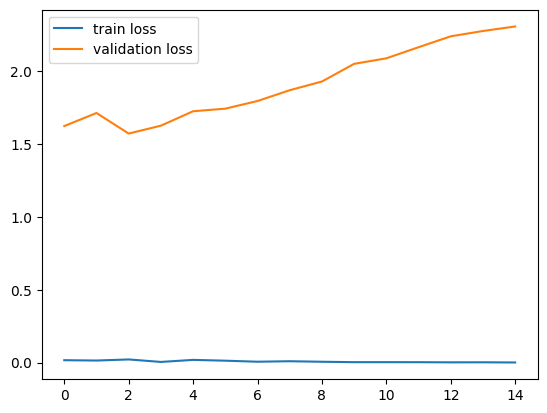

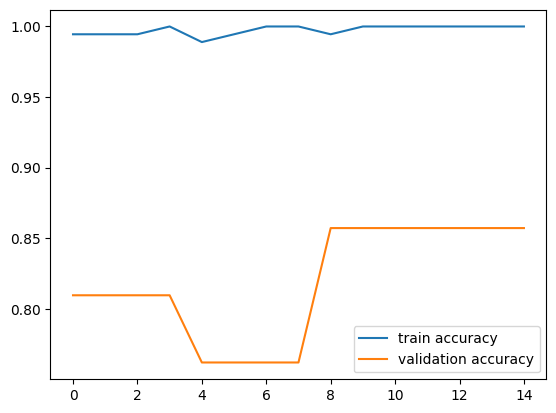

In [83]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[9.9998635e-01 1.5110471e-06]]
0
no, The person is not affected by Brain MRI Images for Brain Tumor


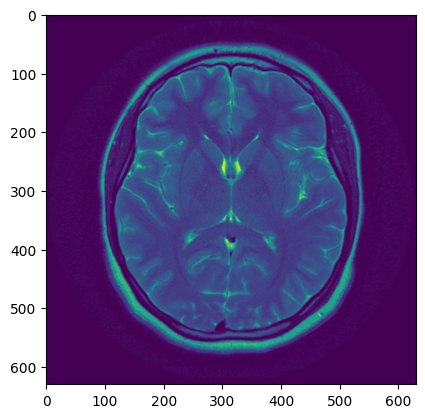

In [86]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
image = mpimg.imread(input_image_path)

# Display the image
plt.imshow(image)

# cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])



input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:
      

  print('yes, The person is  affected by Brain MRI Images for Brain Tumor')

else:

  print('no, The person is not affected by Brain MRI Images for Brain Tumor')